In [3]:
import pandas as pd
import numpy as np
import pickle

### Simple Linear Regression: 

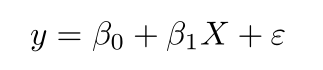

y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).

B0 is the intercept, the predicted value of y when the x is 0.

B1 is the regression coefficient – how much we expect y to change as x increases.

x is the independent variable ( the variable we expect is influencing y).

e is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

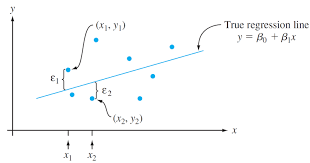

Linear regression
Before knowing what is linear regression, let us get ourselves accustomed to regression. Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.
 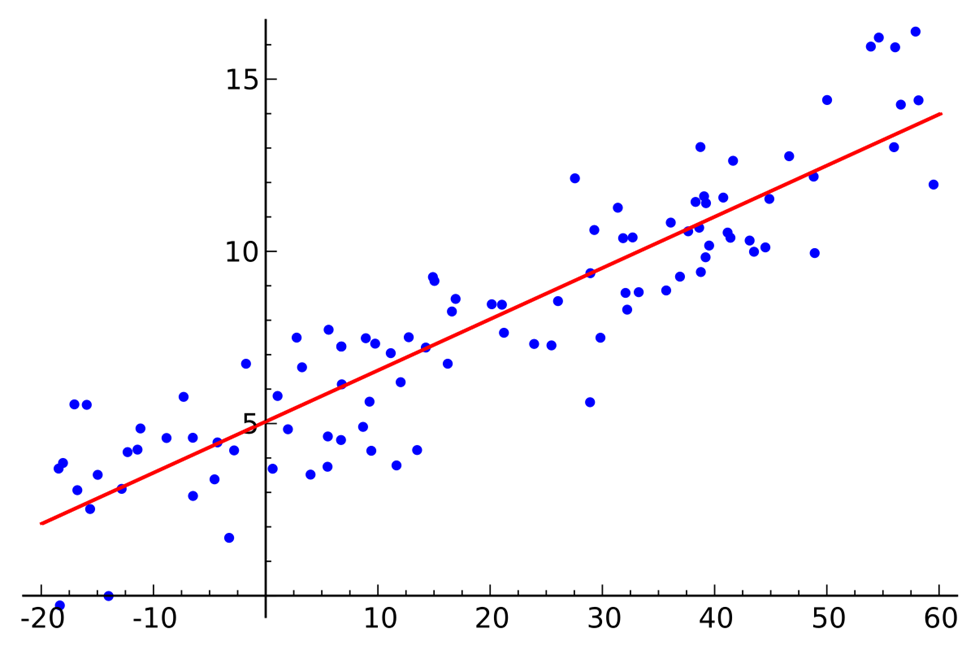
Linear Regression
Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. The red line in the above graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best. The line can be modelled based on the linear equation shown below.
y = a_0 + a_1 * x      ## Linear Equation
The motive of the linear regression algorithm is to find the best values for a_0 and a_1. Before moving on to the algorithm, let’s have a look at two important concepts you must know to better understand linear regression.
Cost Function
The cost function helps us to figure out the best possible values for a_0 and a_1 which would provide the best fit line for the data points. Since we want the best values for a_0 and a_1, we convert this search problem into a minimization problem where we would like to minimize the error between the predicted value and the actual value.
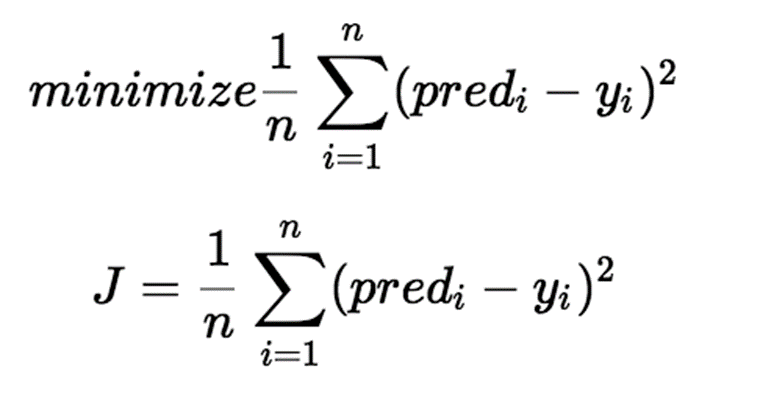
 
Minimization and Cost Function
We choose the above function to minimize. The difference between the predicted values and ground truth measures the error difference. We square the error difference and sum over all data points and divide that value by the total number of data points. This provides the average squared error over all the data points. Therefore, this cost function is also known as the Mean Squared Error(MSE) function. Now, using this MSE function we are going to change the values of a_0 and a_1 such that the MSE value settles at the minima.
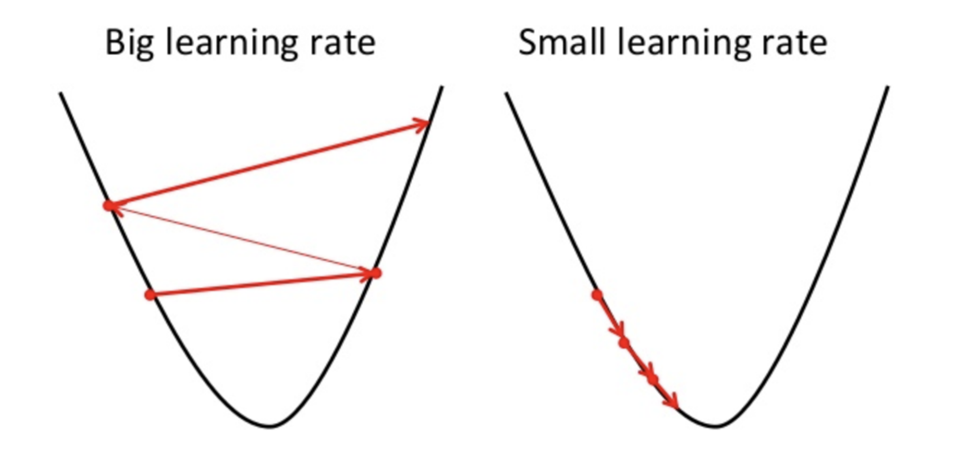
Gradient Descent
The next important concept needed to understand linear regression is gradient descent. Gradient descent is a method of updating a_0 and a_1 to reduce the cost function(MSE). The idea is that we start with some values for a_0 and a_1 and then we change these values iteratively to reduce the cost. Gradient descent helps us on how to change the values.
 
Gradient Descent
To draw an analogy, imagine a pit in the shape of U and you are standing at the topmost point in the pit and your objective is to reach the bottom of the pit. There is a catch, you can only take a discrete number of steps to reach the bottom. If you decide to take one step at a time you would eventually reach the bottom of the pit but this would take a longer time. If you choose to take longer steps each time, you would reach sooner but, there is a chance that you could overshoot the bottom of the pit and not exactly at the bottom. In the gradient descent algorithm, the number of steps you take is the learning rate. This decides on how fast the algorithm converges to the minima.
 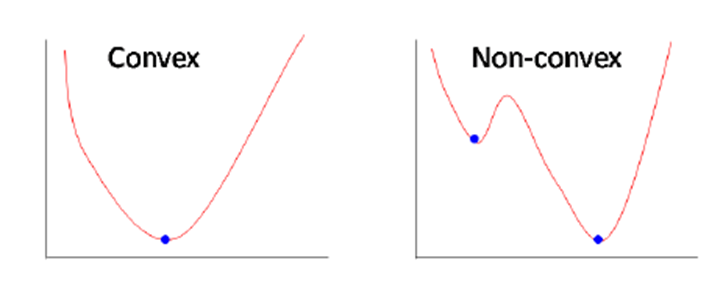
Convex vs Non-convex function
Sometimes the cost function can be a non-convex function where you could settle at a local minima but for linear regression, it is always a convex function.
You may be wondering how to use gradient descent to update a_0 and a_1. To update a_0 and a_1, we take gradients from the cost function. To find these gradients, we take partial derivatives with respect to a_0 and a_1. Now, to understand how the partial derivatives are found below you would require some calculus but if you don’t, it is alright. You can take it as it is.
 
 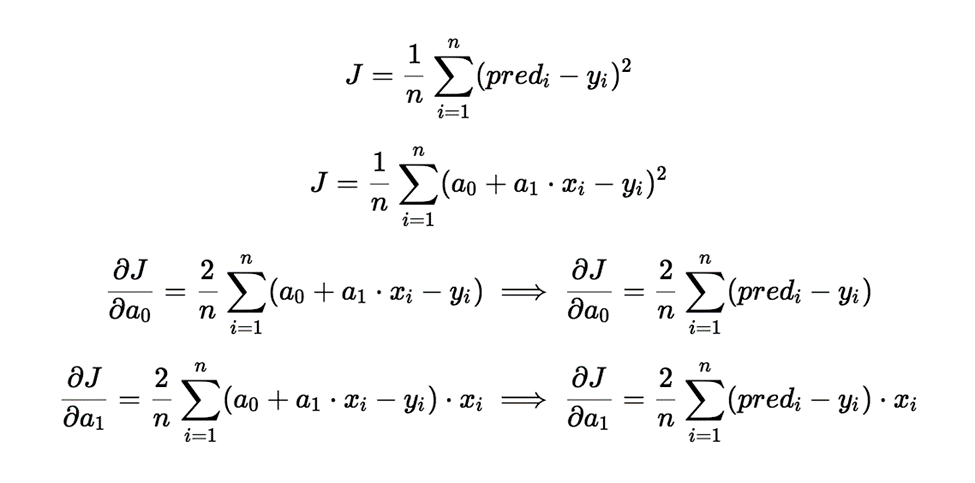
 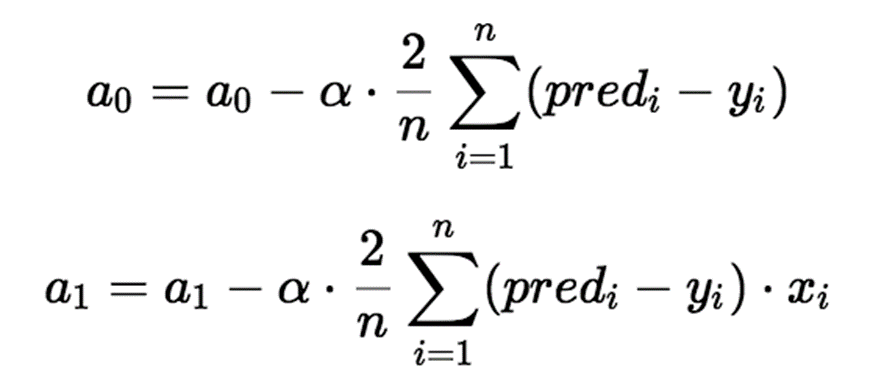
The partial derivates are the gradients and they are used to update the values of a_0 and a_1. Alpha is the learning rate which is a hyperparameter that you must specify. A smaller learning rate could get you closer to the minima but takes more time to reach the minima, a larger learning rate converges sooner but there is a chance that you could overshoot the minima.


### Multiple Linear Regression: 

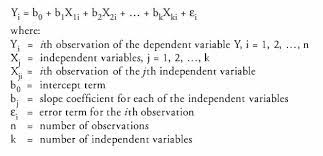

Loading the dataset: 

In [4]:
with open('diabetes.txt','rb') as f:
    data = pickle.load(f)
X = data['data']
y = data['target']
df_data = pd.DataFrame(X, columns=data['feature_names'])
df_data['y'] = y
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
df_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


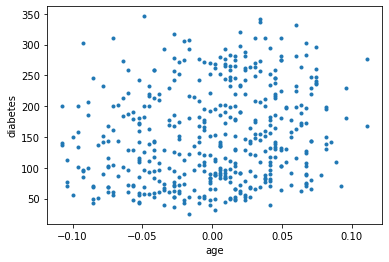

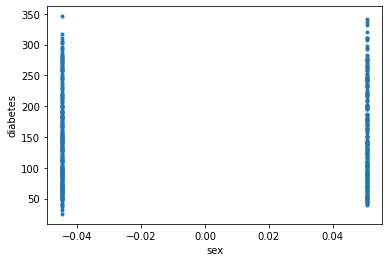

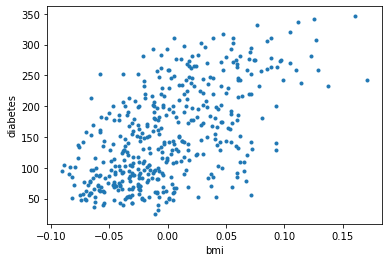

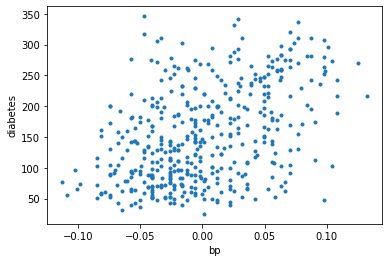

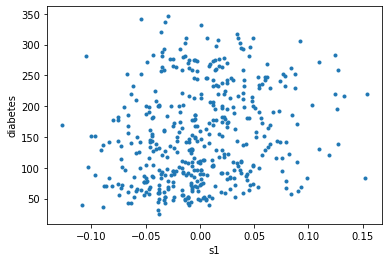

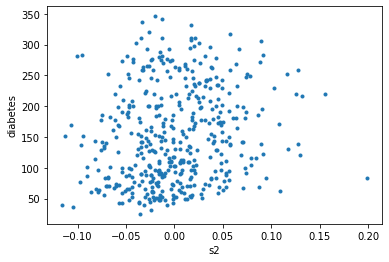

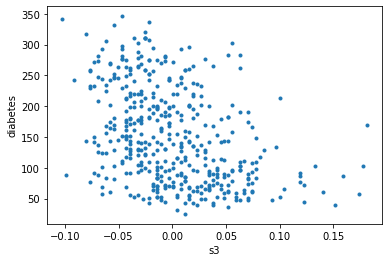

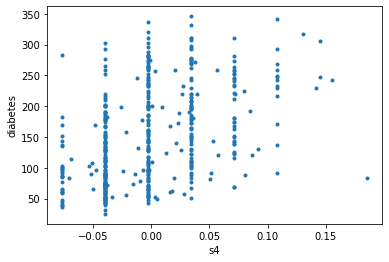

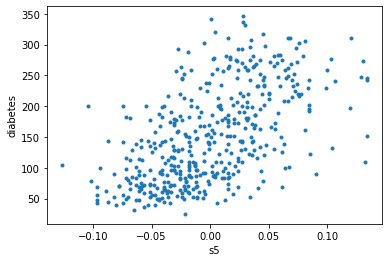

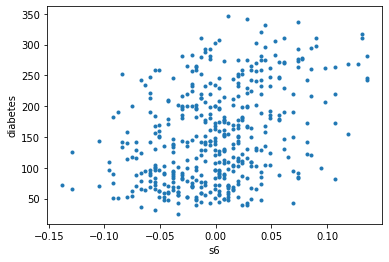

In [3]:
import matplotlib.pyplot as plt
for feture_name in data['feature_names']:
    plt.plot(df_data[feture_name],y,'.')
    plt.xlabel(feture_name)
    plt.ylabel('diabetes')
    plt.show()


Using sklearn to deal with the dataset: 

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class myLinear:
    def __init__(self):
        '''
        buildmodel
        '''
        self.clf = LinearRegression()

    def train(self, X, y):
        '''
        train
        :param X:
        :param y:
        :return:
        '''
        self.clf = self.clf.fit(X, y)
        return self.clf

    def predict(self, X):
        '''
        predict
        :param X:
        :return:
        '''
        return self.clf.predict(X)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def eval_result(y, pre_y):
    '''
    :param y:
    :param pre_y:
    :return:
    '''
    rmse = mean_squared_error(y, pre_y, squared=False)
    mae = mean_absolute_error(y,pre_y)
    return {'rmse':rmse,
            'mae':mae}

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

Obtaining RMSE and MAE:

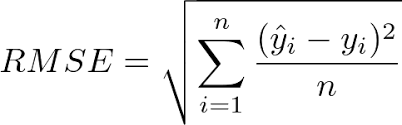

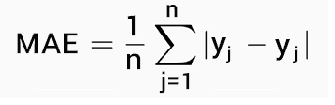

In [13]:
model = myLinear()
model.train(X_train,y_train)


LinearRegression()

In [15]:
pre_y_train = model.predict(X_train)
eval_train = eval_result(y_train, pre_y_train)
print('eval_train\n', eval_train)

eval_train
 {'rmse': 53.245051658083455, 'mae': 43.596851042184795}


In [17]:
pre_y_test = model.predict(X_test)
eval_test = eval_result(y_test, pre_y_test)
print('eval_test\n',eval_test)

eval_test
 {'rmse': 54.704274800539544, 'mae': 41.97487568546232}


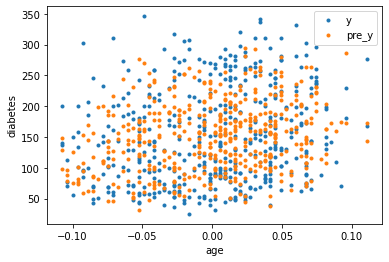

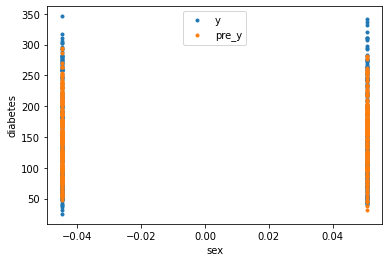

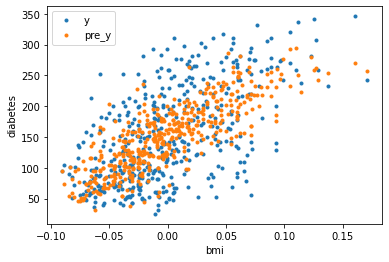

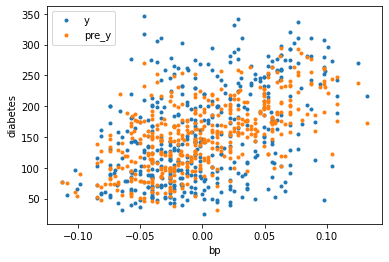

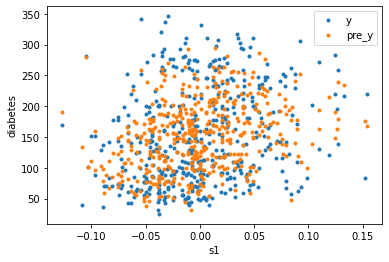

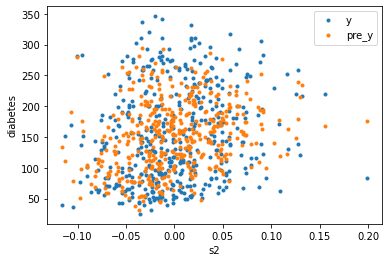

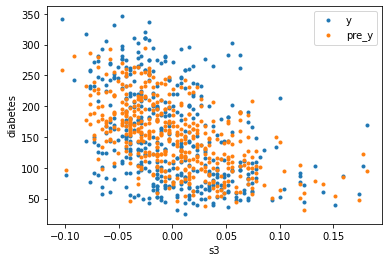

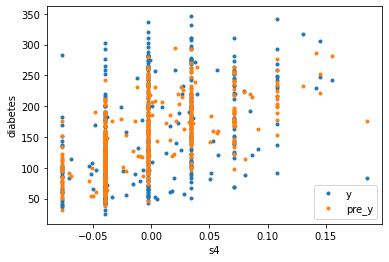

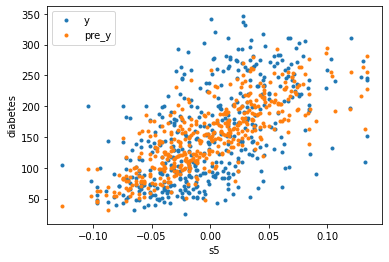

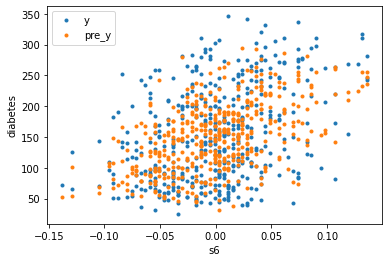

In [10]:
#visualizing the datasets
pre_y = model.predict(X)
import matplotlib.pyplot as plt
for feture_name in data['feature_names']:
    plt.plot(df_data[feture_name],y,'.')
    plt.plot(df_data[feture_name],pre_y,'.')
    plt.legend(['y','pre_y'])
    plt.xlabel(feture_name)
    plt.ylabel('diabetes')
    plt.show()